# Import Libraries

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# Read Data

In [34]:
# --- Load CSV files ---
train_df = pd.read_csv("train.csv")  # adjust path if needed
test_df = pd.read_csv("test.csv")

# EDA

In [35]:
train_df.isna().sum().sum()

0

In [36]:
train_df.duplicated().sum()

0

In [37]:
test_df.isna().sum().sum()

0

In [38]:
test_df.duplicated().sum()

0

Text(0, 0.5, 'Count')

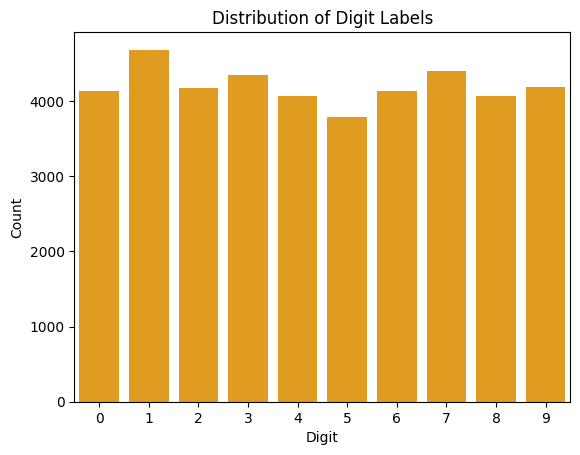

In [39]:
# see the number of labels
import seaborn as sns
sns.countplot(x='label', data=train_df , color= 'orange')
plt.title('Distribution of Digit Labels')
plt.xlabel('Digit')
plt.ylabel('Count')

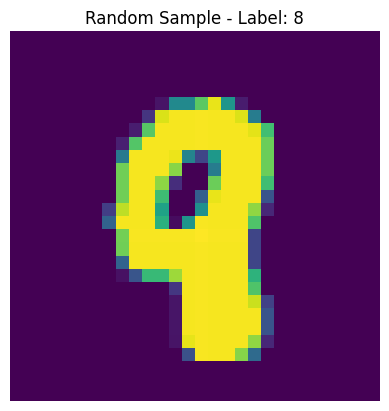

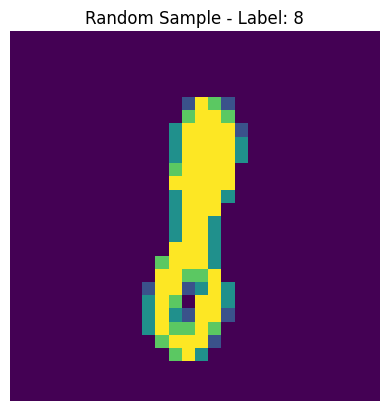

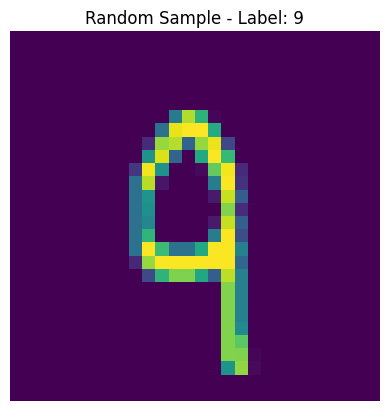

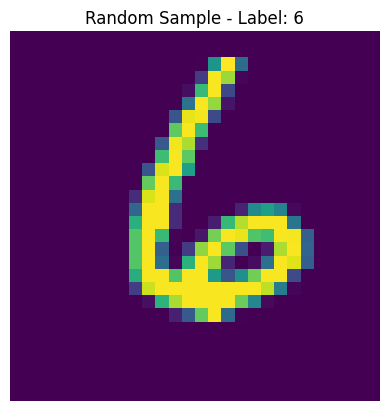

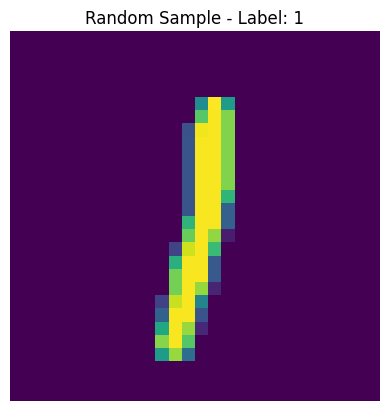

In [40]:
# print 5 random numbers from the data
for _ in range(5):
    i = random.randint(0, len(train_df) - 1)
    label = train_df.iloc[i]['label']
    image = train_df.iloc[i].drop('label').values.reshape(28, 28)
    
    plt.imshow(image)
    plt.title(f"Random Sample - Label: {label}")
    plt.axis('off')
    plt.show()

# Preprocessing

In [41]:
# Split the Train data
X_train = train_df.drop('label', axis=1)  # Normalize to [0,1]
y_train = train_df['label'].values

In [42]:
# Normalize the Data
X_train = X_train.values /255.0
X_test = test_df.values / 255.0  

# Reshape for CNN (n_samples, 28, 28, 1) ---
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


# Building the model

In [43]:
# Build the CNN model 
model = models.Sequential([
    # applies 32 filters of size 3×3 to the input image
    layers.Conv2D(32, (3, 3),
                  # introduces non-linearity.
                   activation='relu', 
                   # specifies input shape: 28×28 pixels with 1 channel (grayscale)
                   input_shape=(28, 28, 1)),
    # Reduces dimensionality and helps with translation invariance
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Converts the 2D feature maps into a 1D vector so it can be passed into dense layers 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
## Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# --- Train the model ---
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1 ,verbose=1)


Epoch 1/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.8556 - loss: 0.4765 - val_accuracy: 0.9760 - val_loss: 0.0724
Epoch 2/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9805 - loss: 0.0649 - val_accuracy: 0.9814 - val_loss: 0.0533
Epoch 3/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9870 - loss: 0.0439 - val_accuracy: 0.9869 - val_loss: 0.0364
Epoch 4/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.9879 - val_loss: 0.0385
Epoch 5/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9879 - val_loss: 0.0386
Epoch 6/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.9821 - val_loss: 0.0559
Epoch 7/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.9957 - loss: 0.0152 - val_accuracy: 0.9821 - val_loss: 0.0586
Epoch 8/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.9963 -

In [45]:

# Predict on test data 
predictions = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [46]:
# Accuracy and loss history
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
train_losses = history.history['loss']
val_losses = history.history['val_loss']

avg_train_acc = sum(train_accuracies) / len(train_accuracies)
avg_val_acc = sum(val_accuracies) / len(val_accuracies)

print(f"\nAverage Train Accuracy over 20 epochs: {avg_train_acc:.4f}")
print(f"Average Validation Accuracy over 20 epochs: {avg_val_acc:.4f}")


Average Train Accuracy over 20 epochs: 0.9920
Average Validation Accuracy over 20 epochs: 0.9869


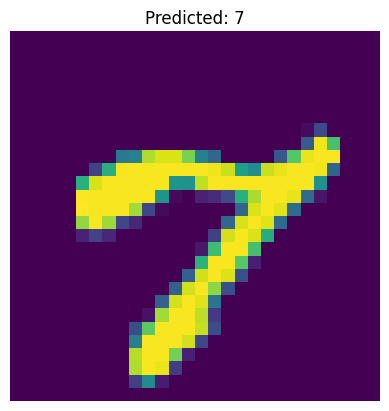

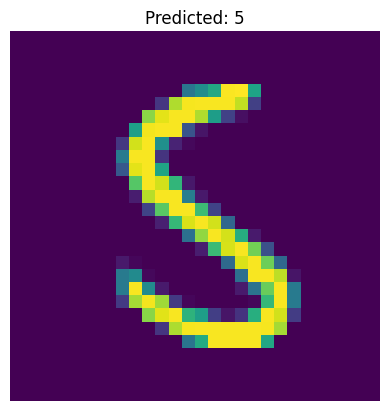

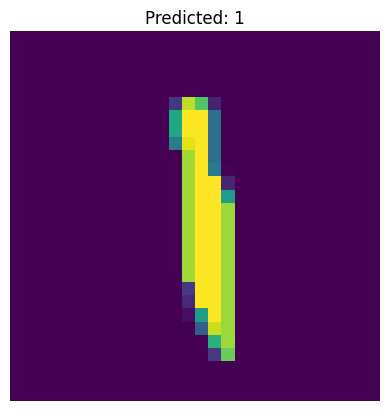

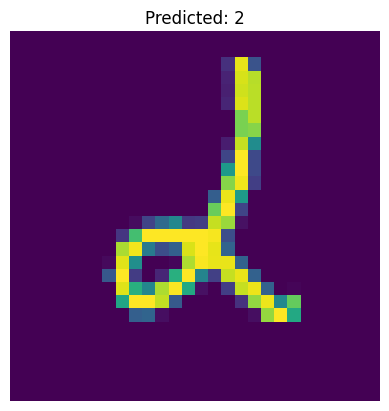

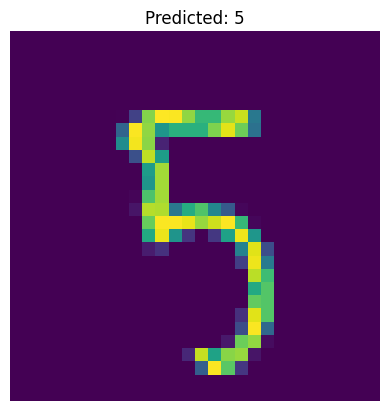

In [47]:
# Show 5 Random predictions with visual output 
for _ in range(5):
    i = random.randint(0, len(X_test) - 1)
    image = X_test[i].reshape(28, 28)
    plt.imshow(image)
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()